山の数OK


In [1]:
# command to view figures in Jupyter notebook
%matplotlib inline 

# import plotting module 
import matplotlib.pyplot as plt 
import japanize_matplotlib


# commands to create high-resolution figures with large labels
%config InlineBackend.figure_formats = {'png', 'retina'} 
plt.rcParams['axes.labelsize'] = 18   # fontsize for figure labels
plt.rcParams['axes.titlesize'] = 20   # fontsize for figure titles
plt.rcParams['font.size'] = 16        # fontsize for figure numbers
plt.rcParams['lines.linewidth'] = 1.6 # line width for plotting
plt.rcParams['axes.unicode_minus'] = False    # マイナス記号の文字化け防止


In [2]:
# import modules
import math
import numpy as np
import scipy as sc
from scipy import signal
from scipy.signal import butter, lfilter, filtfilt
import wave
import pandas as pd


In [3]:
def EMG(file):
    # file open 各自で修正
    record = pd.read_csv(file, delim_whitespace=False, skiprows=None, header=None)
    n = len(record)
    start = int(n * 0.25)
    record = record.iloc[start:]
    waveData = record[0]    
    sampleRate = 1000
        
    # calculate time window
    timeEMG=np.linspace(0, len(waveData)/sampleRate, num=len(waveData))
    
    # calculate frequency
    freq = 1/np.mean(np.diff(timeEMG))    
    
    # save relevant data in array
    xx={'sampleRate':sampleRate,\
        'waveData':waveData,\
        'timeEMG':timeEMG,\
        'freq':freq,\
    }  
    
    # plot EMG
    plt.figure(figsize=(18,6))
    plt.xlabel(r'Time (sec)')
    plt.ylabel(r'Voltage (mV)')
    plt.plot(xx['timeEMG'],xx['waveData'], 'b')
    # plt.xlim(0,max(xx['timeEMG']))
    plt.xlim(0,120)
    plt.title("心電図データの原波形の時間変化")
    
    return xx


/var/folders/4g/bbm0gjv155936xsdg_41_4080000gn/T/ipykernel_2150/1735096947.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  record = pd.read_csv(file, delim_whitespace=False, skiprows=None, header=None)


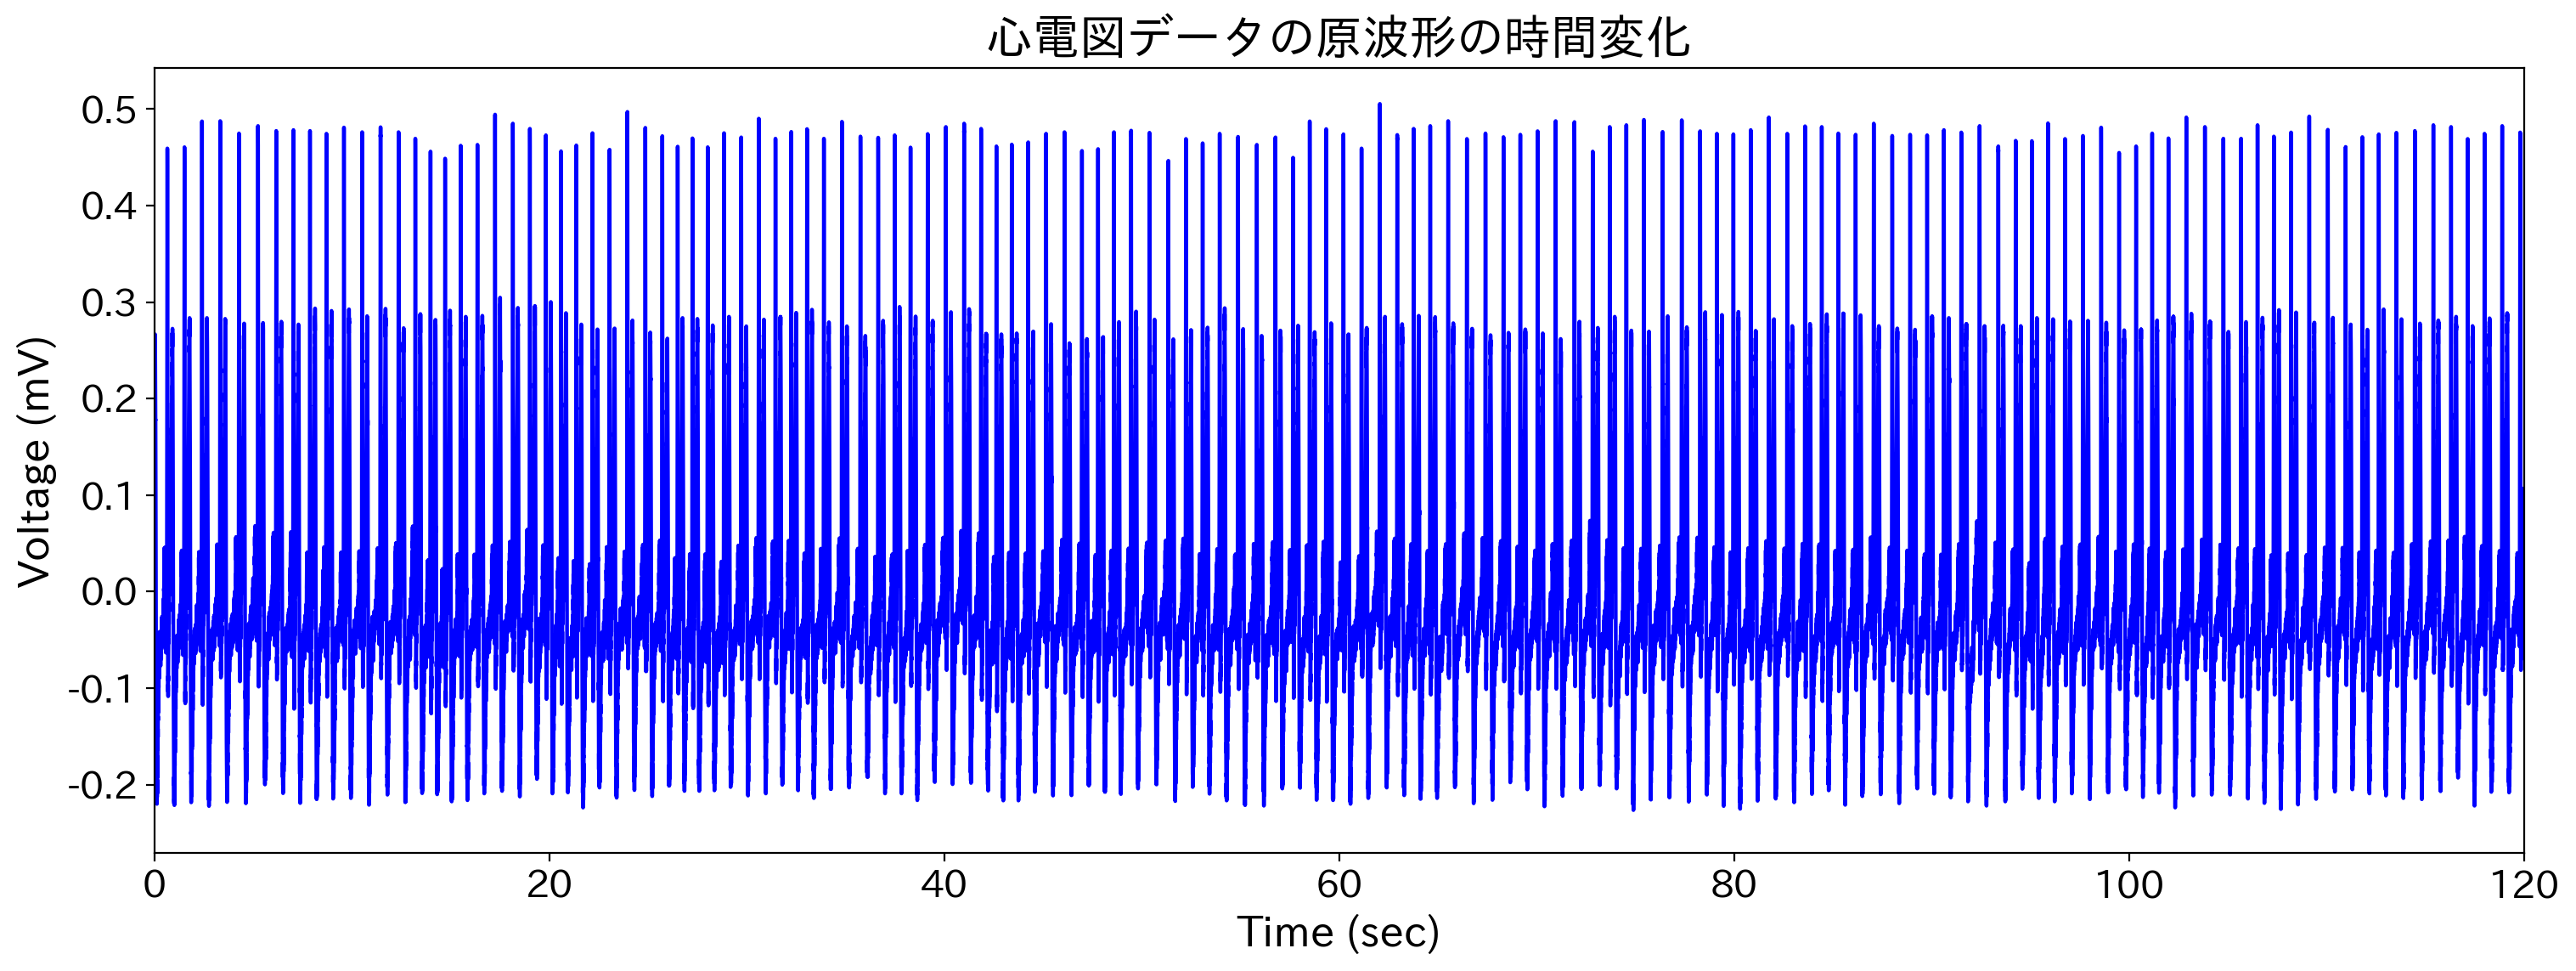

In [4]:
file = "/Users/gotokenichiro/Rits/2024AW/知能情報学実験/heart_beat/data/adv/ECG_ansei_hatten_RyukiKishimura_1219_data.csv"
xx = EMG(file)


/var/folders/4g/bbm0gjv155936xsdg_41_4080000gn/T/ipykernel_2150/3836375285.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  record = pd.read_csv(file, delim_whitespace=False, skiprows=None, header=None)


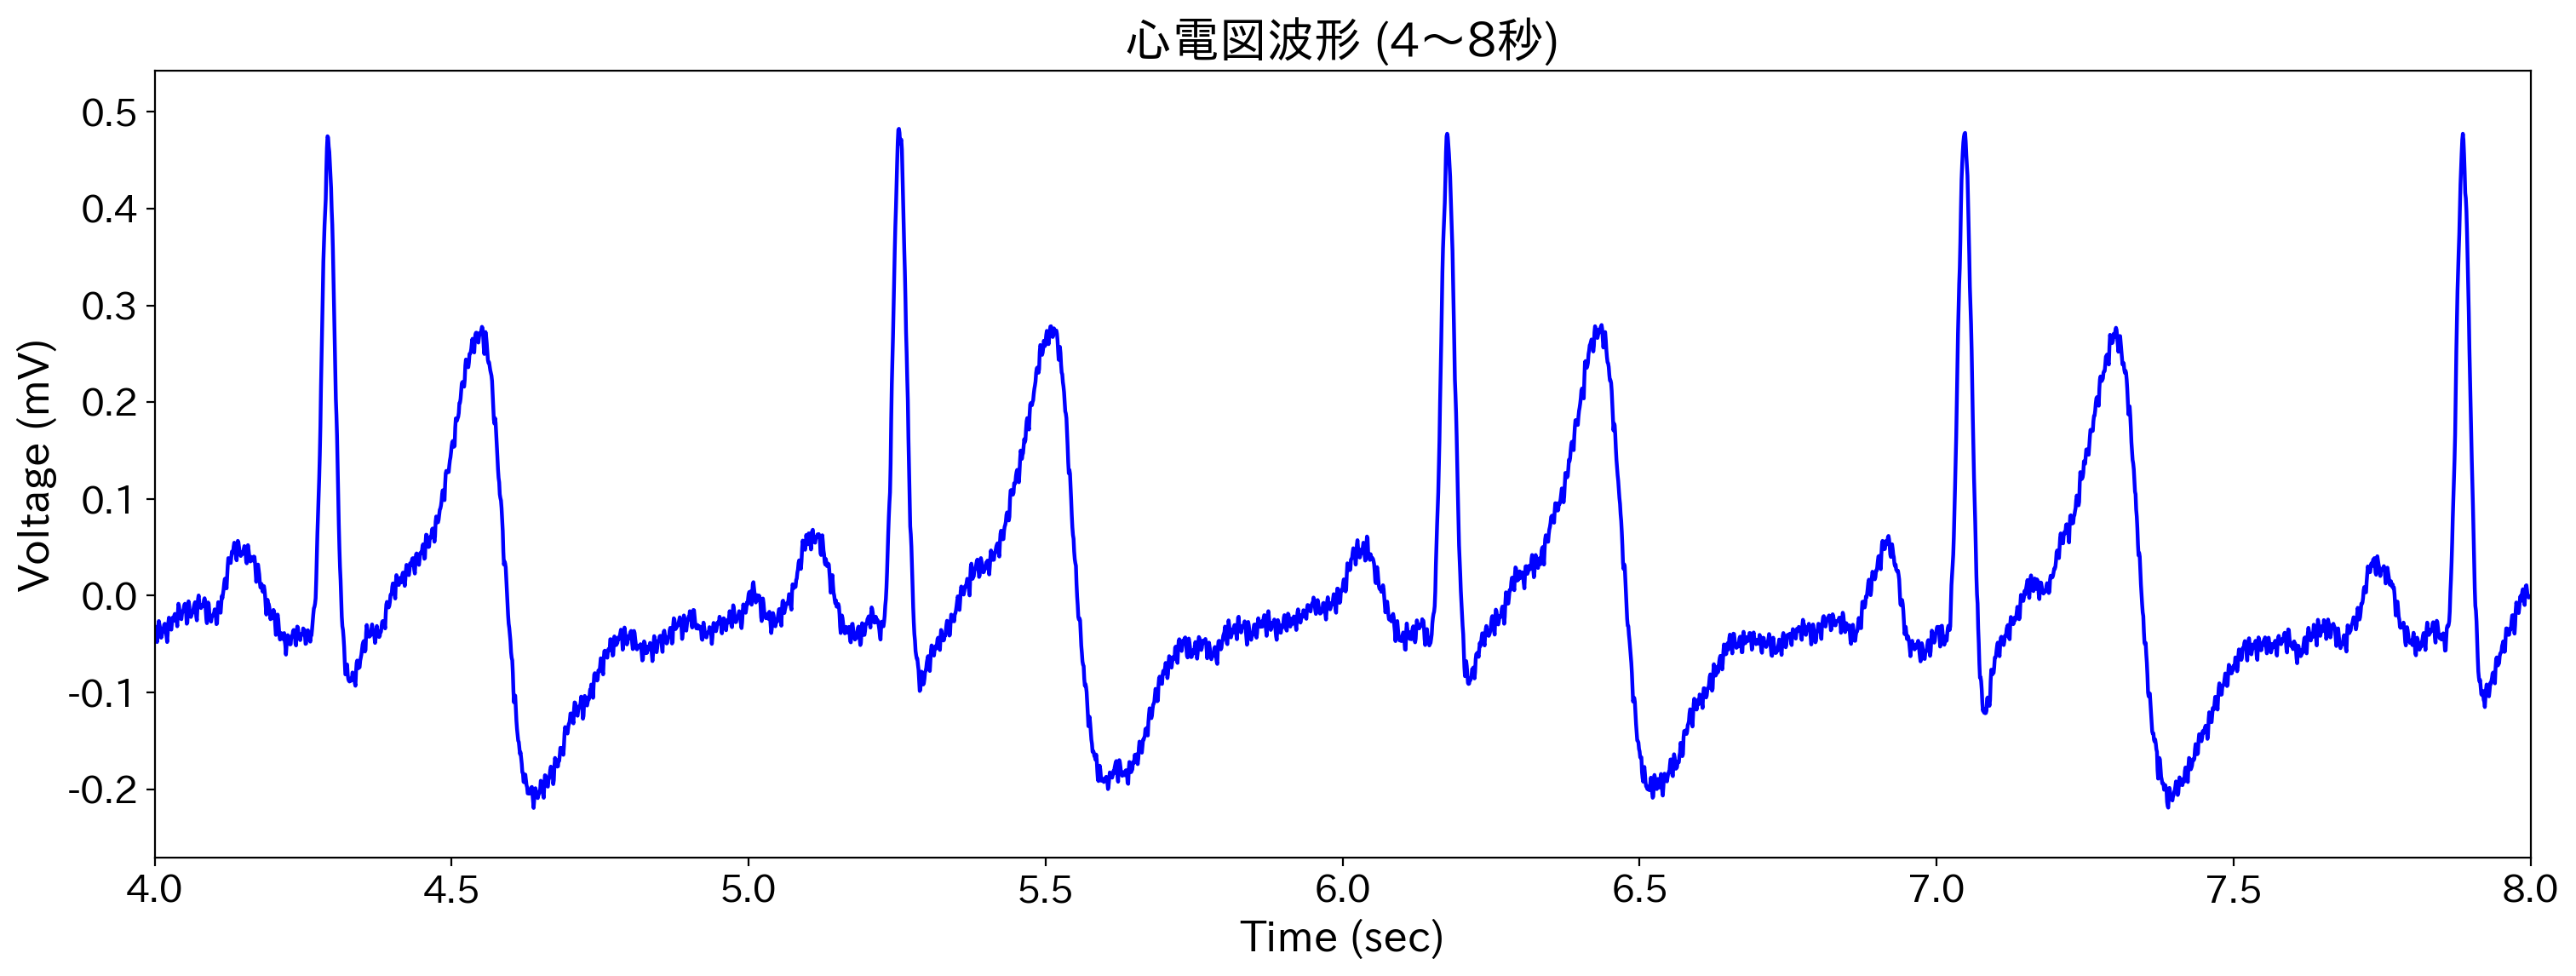

In [5]:
def mini_EMG(file):
    # file open 各自で修正
    record = pd.read_csv(file, delim_whitespace=False, skiprows=None, header=None)
    n = len(record)
    start = int(n * 0.25)
    record = record.iloc[start:]
    waveData = record[0]    
    sampleRate = 1000
        
    # calculate time window
    timeEMG=np.linspace(0, len(waveData)/sampleRate, num=len(waveData))
    
    # calculate frequency
    freq = 1/np.mean(np.diff(timeEMG))    
    
    # save relevant data in array
    xx={'sampleRate':sampleRate,\
        'waveData':waveData,\
        'timeEMG':timeEMG,\
        'freq':freq,\
    }  
    
    # plot EMG
    plt.figure(figsize=(18,6))
    plt.xlabel(r'Time (sec)')
    plt.ylabel(r'Voltage (mV)')
    plt.plot(xx['timeEMG'],xx['waveData'], 'b')
    # plt.xlim(0,max(xx['timeEMG']))
    plt.xlim(4, 8)
    plt.title("心電図波形 (4〜8秒)")
    
    return xx

xx = mini_EMG(file)


In [6]:
# band-pass Butterworth filter at 10-400Hz
b, a = butter(2, ([10, 400]/(xx['freq']/2)), btype = 'bandpass')
dataf = filtfilt(b, a, xx['waveData'])


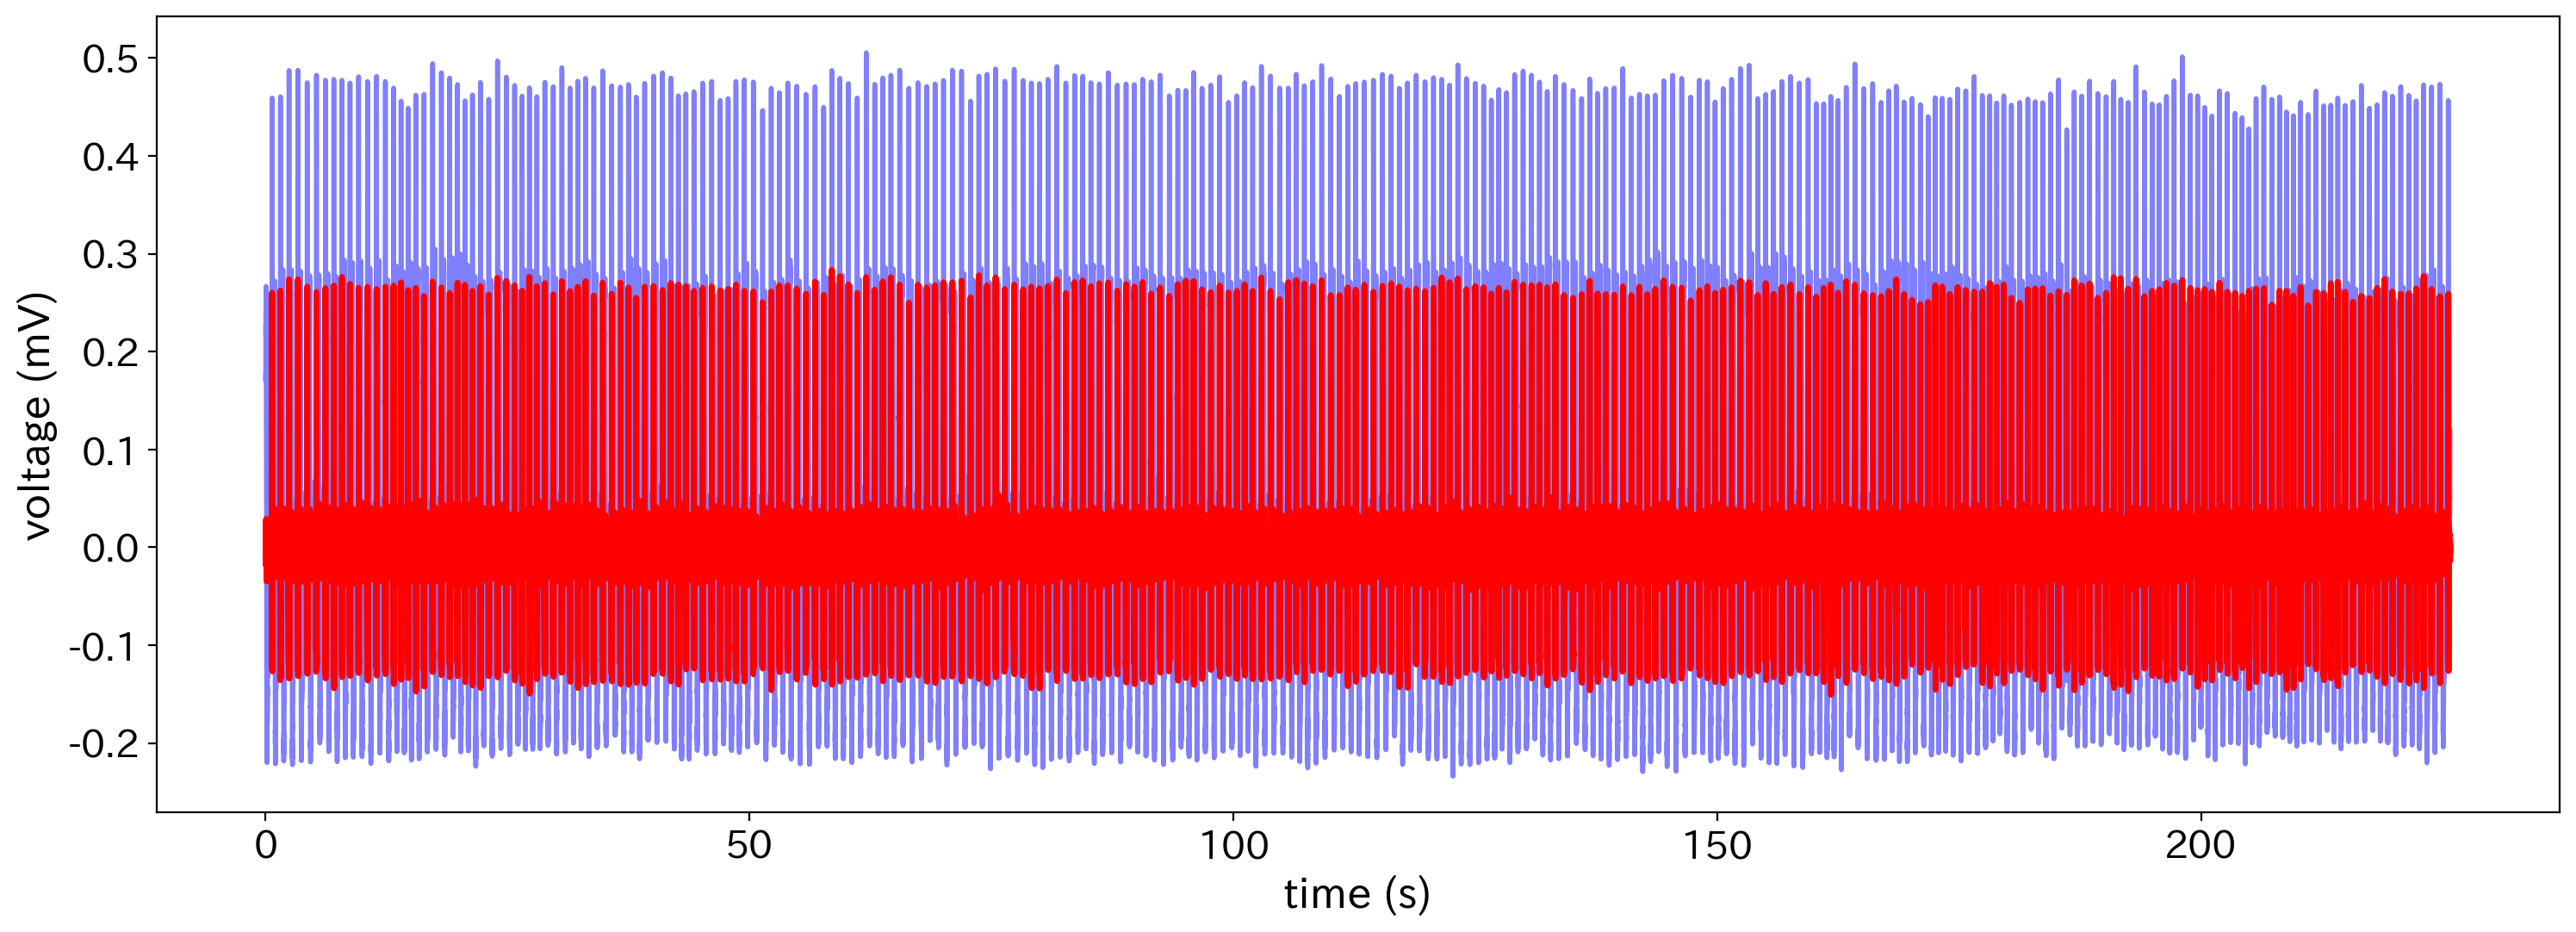

In [7]:
# plot EMG signal
plt.figure(figsize=(18,6))
plt.xlabel(r'time (s)')
plt.ylabel(r'voltage (mV)')
plt.plot(xx['timeEMG'],xx['waveData'], 'b', linewidth=2.0, alpha=0.5)
plt.plot(xx['timeEMG'],dataf, 'r', linewidth=2.5)
#plt.xlim(2.1,2.2)
#plt.ylim(-10000,3000);


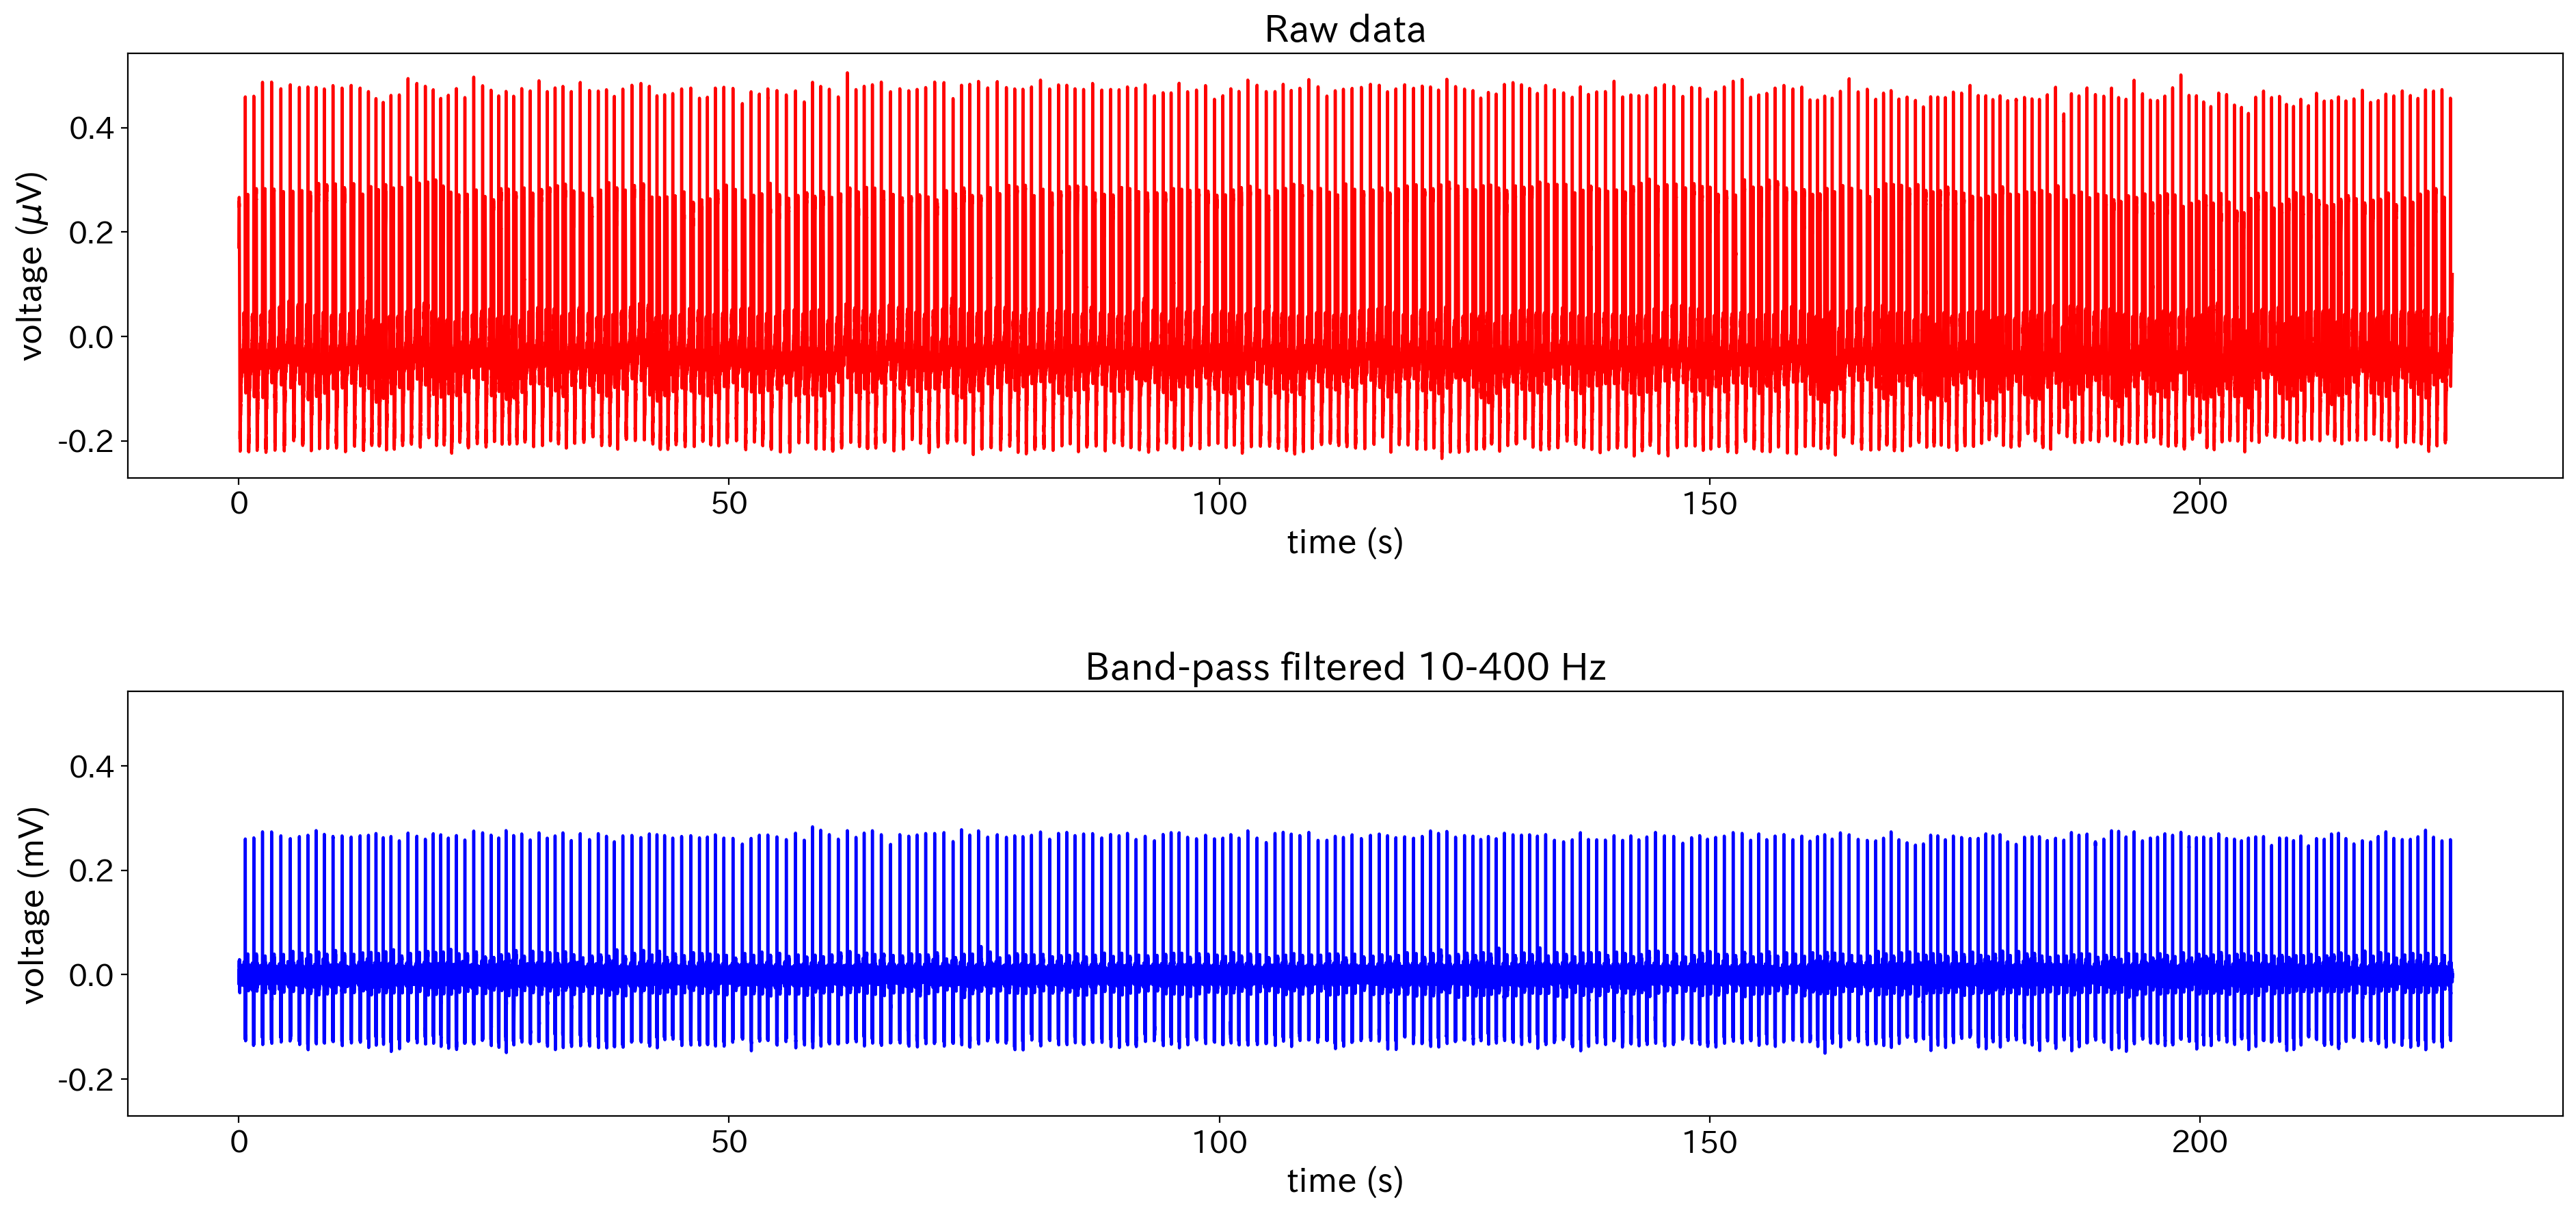

In [8]:
fig, (ax1,ax2) = plt.subplots(2, 1, sharex= False, sharey= True, figsize = (20,10))

# plot raw data
ax1.plot(xx['timeEMG'], xx['waveData'], 'r')
ax1.set_title('Raw data', fontsize=20)
#ax1.set_xlim(3.0,3.5)
#ax1.set_ylim(-8000,3500)
ax1.set_xlabel('time (s)')
ax1.set_ylabel('voltage ($\mu$V)')

# plot filtered data
ax2.plot(xx['timeEMG'], dataf, 'b')
ax2.set_title('Band-pass filtered 10-400 Hz', fontsize=20)
#ax2.set_xlim(3.0,3.5)
#ax2.set_ylim(-8000,3500)
ax2.set_xlabel('time (s)')
ax2.set_ylabel('voltage (mV)')

# spacing between subplots
plt.tight_layout(pad=3.0)


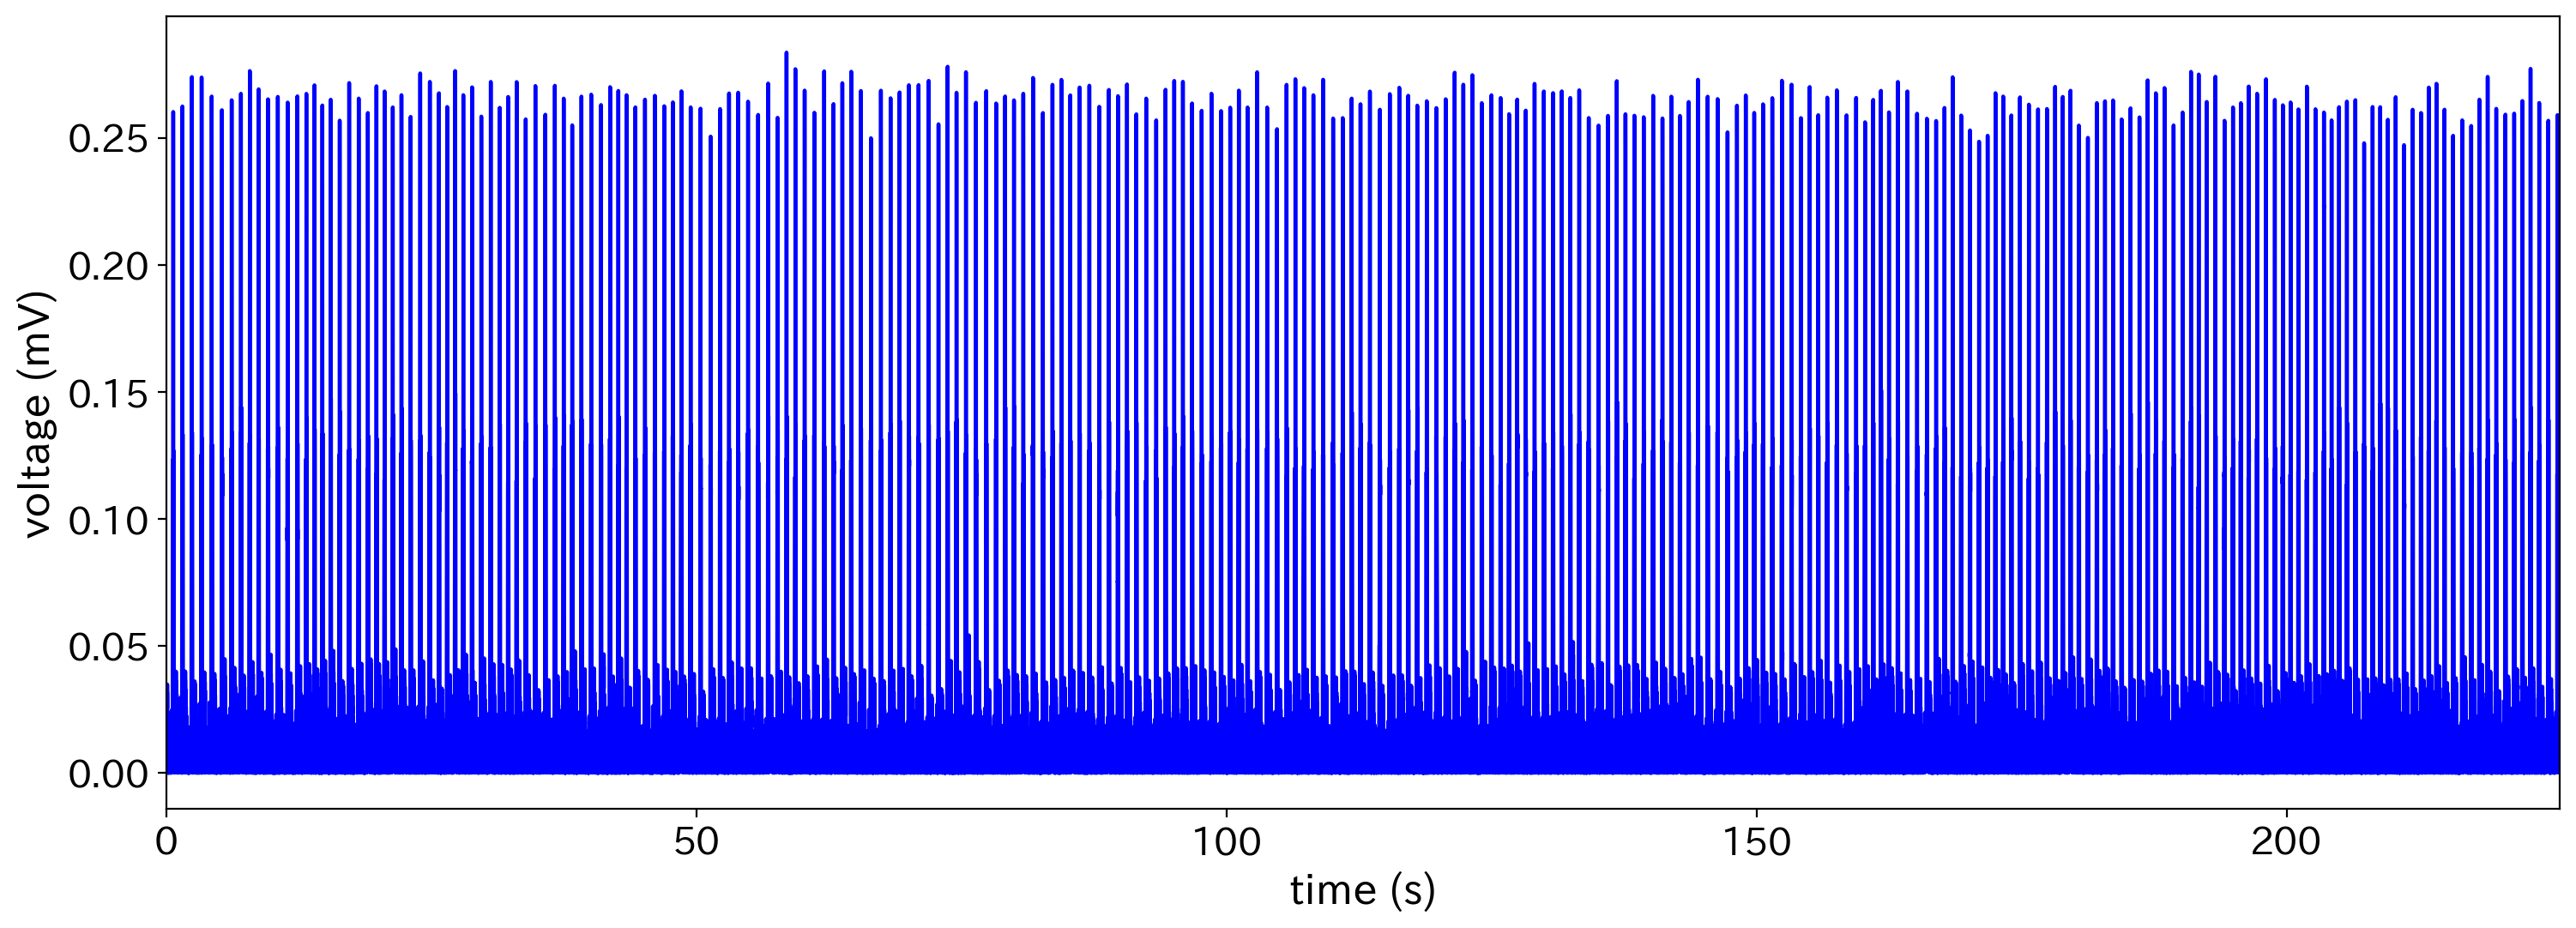

In [9]:
# rectify EMG signal
absSignal = np.absolute(dataf)
timeAbs=np.linspace(0, len(absSignal)/xx['sampleRate'], num=len(absSignal))

# plot rectified data
plt.figure(figsize=(18,6))
plt.xlabel(r'time (s)')
plt.ylabel(r'voltage (mV)')
plt.plot(xx['timeEMG'],absSignal,'b')
plt.xlim(0,max(xx['timeEMG']))
#plt.ylim(-500,8000)
plt.show()


In [10]:
# low-pass Butterworth filter for envelope detection（包絡線の検出）
lowp = 8
sfreq = xx['sampleRate']
low_pass = lowp/sfreq
b, a = sc.signal.butter(4, low_pass, btype='lowpass')
datafrle = filtfilt(b, a, absSignal)


(0.0, 225.75)

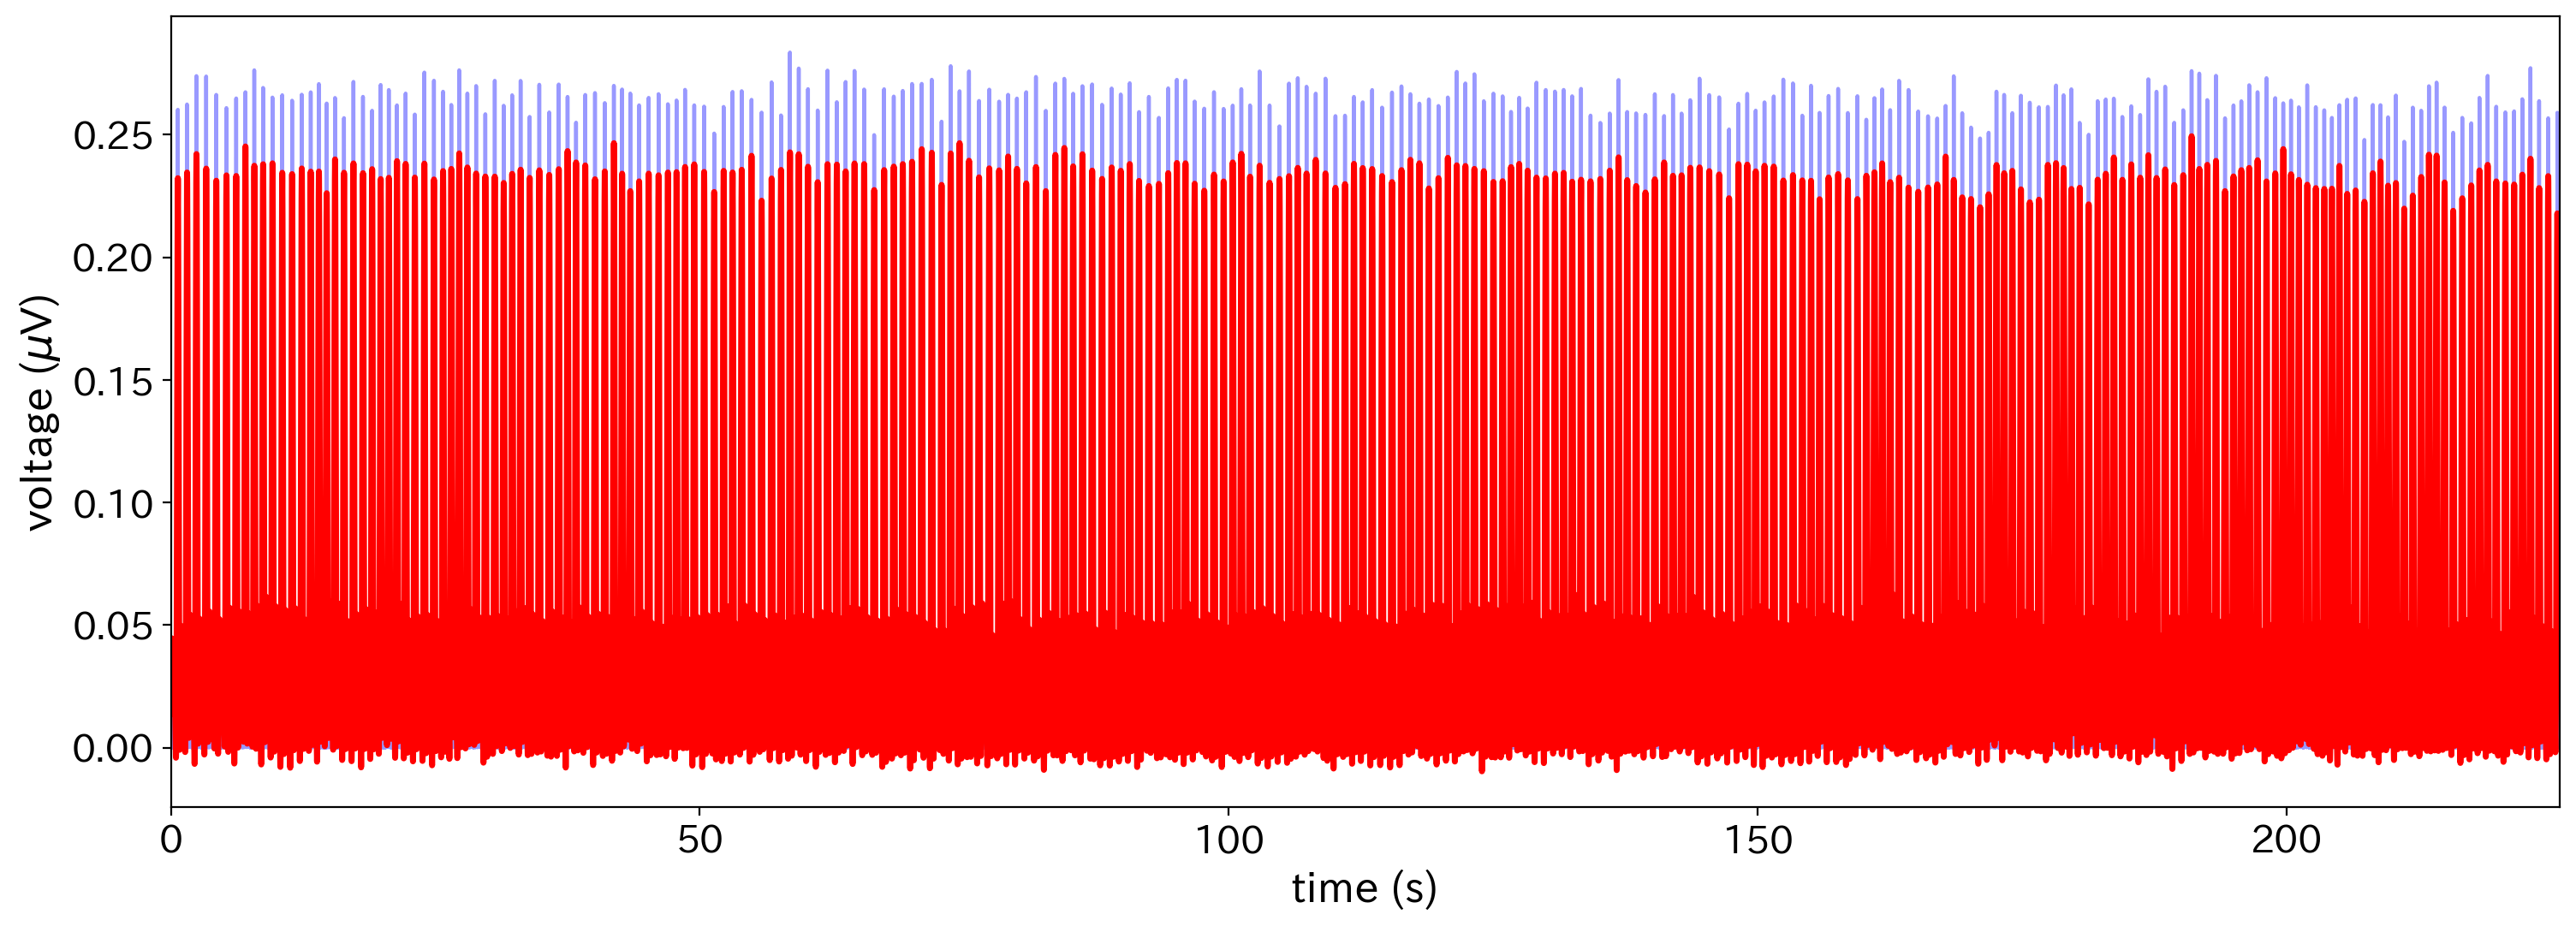

In [11]:
# plot rectified EMG signal with superimposed envelope detection with low-pass filter
plt.figure(figsize=(18,6))
plt.xlabel('time (s)')
plt.ylabel('voltage ($\mu$V)')
plt.plot(timeAbs,absSignal, 'b', alpha=0.4)
plt.plot(timeAbs,datafrle*3, 'r', linewidth=2.5) # multiply envelope to see data fit
plt.xlim(0,max(xx['timeEMG']))
#plt.ylim(-400,7500);


In [12]:
def contractions(threshold):
    
    # ascending threshold crossings 閾値の開始
    cstarts = []
    for i in range(1, len(datafrle)):
        if datafrle[i-1] < threshold and datafrle[i] >= threshold:
            cstarts.append(i)
    
    # descending threshold crossings 閾値の終了
    cstops = []
    for i in range(1, len(datafrle)):
        if datafrle[i-1] >= threshold and datafrle[i] < threshold:
            cstops.append(i)
    
    # divide start and stop times by the sampling rate to get times in seconds　開始・終了を時刻で表示
    starts=[]
    for n in range(0, len(cstarts)):
        starttime = cstarts[n]/xx['sampleRate']
        starts.append(starttime)

    stops=[]
    for n in range(0, len(cstops)):
        stoptime = cstops[n]/xx['sampleRate']
        stops.append(stoptime)    
    
    # plot envelope with contraction start and stop times marked by dashed lines
    plt.figure(figsize=(20,6))
    plt.xlabel('time (s)')
    plt.ylabel('voltage ($\mu$V)')
    plt.plot(timeAbs, datafrle, 'b', linewidth=2.0)      
    for n in range(0, len(starts)):
        plt.axvline(x=starts[n], color='k',linewidth=2.0, linestyle='--')
    for n in range(0, len(stops)):
        plt.axvline(x=stops[n], color='k',linewidth=2.0, linestyle='--')
    plt.xlim(0, max(xx['timeEMG']))
    
    # calculate contraction durations
    durs=[]
    for n in range(0,len(starts)):
        durs.append(stops[n]-starts[n])
        print('Contraction lasted %g seconds'%(round(durs[n], 2)))
        
    return


Contraction lasted 0.2 seconds
Contraction lasted 0.2 seconds
Contraction lasted 0.2 seconds
Contraction lasted 0.19 seconds
Contraction lasted 0.19 seconds
Contraction lasted 0.19 seconds
Contraction lasted 0.19 seconds
Contraction lasted 0.2 seconds
Contraction lasted 0.19 seconds
Contraction lasted 0.2 seconds
Contraction lasted 0.19 seconds
Contraction lasted 0.19 seconds
Contraction lasted 0.19 seconds
Contraction lasted 0.2 seconds
Contraction lasted 0.19 seconds
Contraction lasted 0.19 seconds
Contraction lasted 0.19 seconds
Contraction lasted 0.2 seconds
Contraction lasted 0.19 seconds
Contraction lasted 0.19 seconds
Contraction lasted 0.19 seconds
Contraction lasted 0.19 seconds
Contraction lasted 0.19 seconds
Contraction lasted 0.19 seconds
Contraction lasted 0.19 seconds
Contraction lasted 0.19 seconds
Contraction lasted 0.19 seconds
Contraction lasted 0.19 seconds
Contraction lasted 0.19 seconds
Contraction lasted 0.2 seconds
Contraction lasted 0.19 seconds
Contraction last

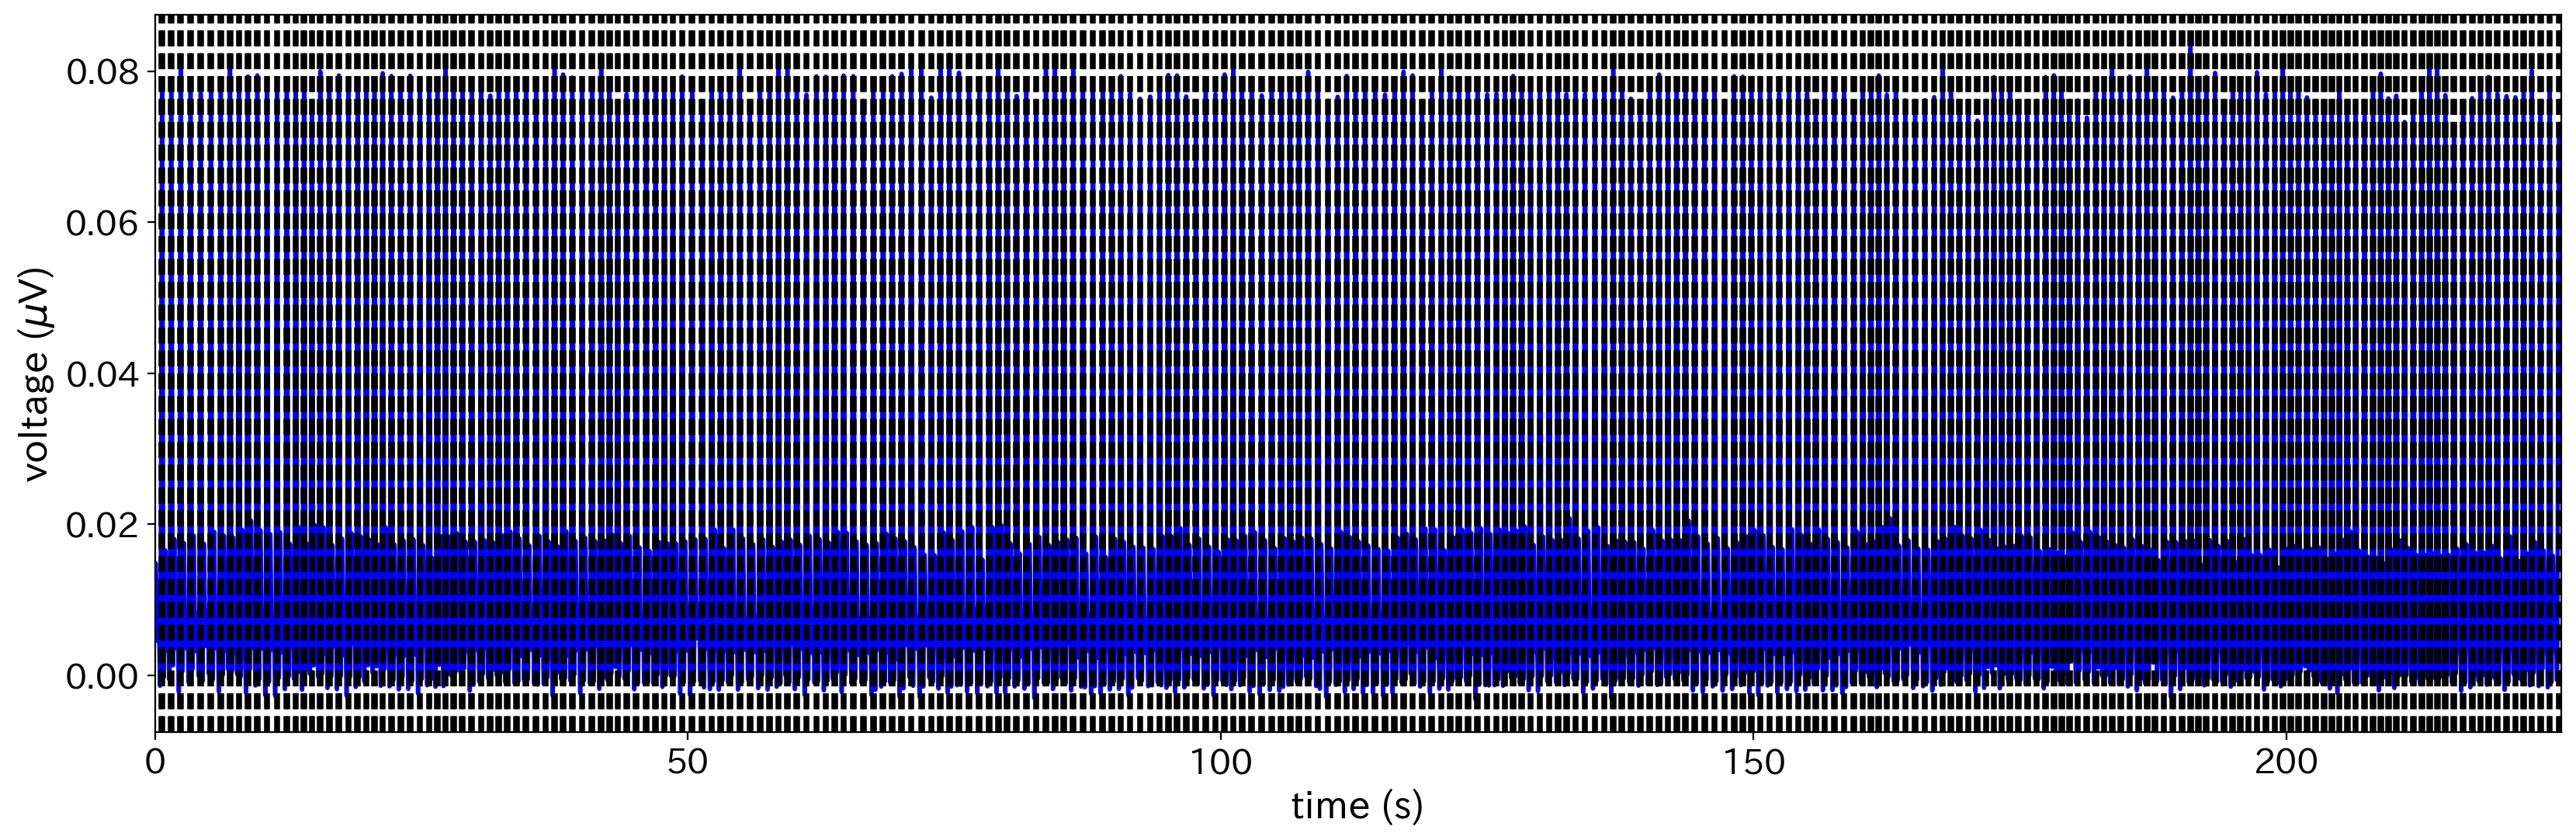

In [13]:
contractions(threshold=0.025) #閾値の設定: reportでは毎回このグラフを描くことはしない。
